In [61]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV

In [62]:
dataset = pd.read_csv('titanic.csv')

In [63]:
df_x = dataset.drop(columns=['Survived'])
df_x

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [64]:
df_y = dataset[['Survived']]
df_y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [65]:
df_x.drop(columns=['Name', 'PassengerId', 'Ticket'], inplace=True)

In [66]:
df_x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,male,22.0,1,0,7.2500,NaN,S
1,1,female,38.0,1,0,71.2833,C85,C
2,3,female,26.0,0,0,7.9250,NaN,S
3,1,female,35.0,1,0,53.1000,C123,S
4,3,male,35.0,0,0,8.0500,NaN,S


In [67]:
df_x.isna().sum()

Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [68]:
df_x['isNanAge'] = df_x['Age'].isna()

In [69]:
df_x

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,isNanAge
0,3,male,22.0,1,0,7.2500,NaN,S,False
1,1,female,38.0,1,0,71.2833,C85,C,False
2,3,female,26.0,0,0,7.9250,NaN,S,False
3,1,female,35.0,1,0,53.1000,C123,S,False
4,3,male,35.0,0,0,8.0500,NaN,S,False
...,...,...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,NaN,S,False
887,1,female,19.0,0,0,30.0000,B42,S,False
888,3,female,NaN,1,2,23.4500,NaN,S,True
889,1,male,26.0,0,0,30.0000,C148,C,False


In [70]:
df_x['isNanCabin'] = df_x['Cabin'].isna()
df_x['isNanEmbarked'] = df_x['Embarked'].isna()

In [71]:
df_x

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,isNanAge,isNanCabin,isNanEmbarked
0,3,male,22.0,1,0,7.2500,NaN,S,False,True,False
1,1,female,38.0,1,0,71.2833,C85,C,False,False,False
2,3,female,26.0,0,0,7.9250,NaN,S,False,True,False
3,1,female,35.0,1,0,53.1000,C123,S,False,False,False
4,3,male,35.0,0,0,8.0500,NaN,S,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,NaN,S,False,True,False
887,1,female,19.0,0,0,30.0000,B42,S,False,False,False
888,3,female,NaN,1,2,23.4500,NaN,S,True,True,False
889,1,male,26.0,0,0,30.0000,C148,C,False,False,False


In [72]:
df_x['Age'].fillna(np.mean(dataset['Age']), inplace=True)

In [73]:
df_x.isna().sum()

Pclass             0
Sex                0
Age                0
SibSp              0
Parch              0
Fare               0
Cabin            687
Embarked           2
isNanAge           0
isNanCabin         0
isNanEmbarked      0
dtype: int64

In [74]:
df_x.replace({
    'Sex': {
        'male':0,
        'female':1
    }
}, inplace=True)

In [75]:
df_x

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,isNanAge,isNanCabin,isNanEmbarked
0,3,0,22.000000,1,0,7.2500,NaN,S,False,True,False
1,1,1,38.000000,1,0,71.2833,C85,C,False,False,False
2,3,1,26.000000,0,0,7.9250,NaN,S,False,True,False
3,1,1,35.000000,1,0,53.1000,C123,S,False,False,False
4,3,0,35.000000,0,0,8.0500,NaN,S,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
886,2,0,27.000000,0,0,13.0000,NaN,S,False,True,False
887,1,1,19.000000,0,0,30.0000,B42,S,False,False,False
888,3,1,29.699118,1,2,23.4500,NaN,S,True,True,False
889,1,0,26.000000,0,0,30.0000,C148,C,False,False,False


In [76]:
df_x['Cabin'].replace('[^(NaN)]', int(1), regex=True,inplace=True)

In [77]:
df_x['Cabin']

0      NaN
1      1.0
2      NaN
3      1.0
4      NaN
      ... 
886    NaN
887    1.0
888    NaN
889    1.0
890    NaN
Name: Cabin, Length: 891, dtype: float64

In [78]:
df_x['Cabin'].fillna(0, inplace=True)

In [79]:
df_x['Cabin']

0      0.0
1      1.0
2      0.0
3      1.0
4      0.0
      ... 
886    0.0
887    1.0
888    0.0
889    1.0
890    0.0
Name: Cabin, Length: 891, dtype: float64

In [80]:
df_x

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,isNanAge,isNanCabin,isNanEmbarked
0,3,0,22.000000,1,0,7.2500,0.0,S,False,True,False
1,1,1,38.000000,1,0,71.2833,1.0,C,False,False,False
2,3,1,26.000000,0,0,7.9250,0.0,S,False,True,False
3,1,1,35.000000,1,0,53.1000,1.0,S,False,False,False
4,3,0,35.000000,0,0,8.0500,0.0,S,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
886,2,0,27.000000,0,0,13.0000,0.0,S,False,True,False
887,1,1,19.000000,0,0,30.0000,1.0,S,False,False,False
888,3,1,29.699118,1,2,23.4500,0.0,S,True,True,False
889,1,0,26.000000,0,0,30.0000,1.0,C,False,False,False


In [81]:
df_x['Cabin'].count()

891

In [82]:
df_x['Embarked']

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [83]:
df_x

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,isNanAge,isNanCabin,isNanEmbarked
0,3,0,22.000000,1,0,7.2500,0.0,S,False,True,False
1,1,1,38.000000,1,0,71.2833,1.0,C,False,False,False
2,3,1,26.000000,0,0,7.9250,0.0,S,False,True,False
3,1,1,35.000000,1,0,53.1000,1.0,S,False,False,False
4,3,0,35.000000,0,0,8.0500,0.0,S,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
886,2,0,27.000000,0,0,13.0000,0.0,S,False,True,False
887,1,1,19.000000,0,0,30.0000,1.0,S,False,False,False
888,3,1,29.699118,1,2,23.4500,0.0,S,True,True,False
889,1,0,26.000000,0,0,30.0000,1.0,C,False,False,False


In [84]:
df_x.replace({
    'Embarked': {
        'S':1,
        'C': 2,
        'Q': 3
    }
}, inplace=True)

In [85]:
df_x['Embarked'].fillna(0, inplace=True)

In [86]:
df_x['Embarked']

0      1.0
1      2.0
2      1.0
3      1.0
4      1.0
      ... 
886    1.0
887    1.0
888    1.0
889    2.0
890    3.0
Name: Embarked, Length: 891, dtype: float64

In [87]:
df_x[df_x['Embarked'] == 0]

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,isNanAge,isNanCabin,isNanEmbarked
61,1,1,38.0,0,0,80.0,1.0,0.0,False,False,True
829,1,1,62.0,0,0,80.0,1.0,0.0,False,False,True


In [88]:
df_x

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,isNanAge,isNanCabin,isNanEmbarked
0,3,0,22.000000,1,0,7.2500,0.0,1.0,False,True,False
1,1,1,38.000000,1,0,71.2833,1.0,2.0,False,False,False
2,3,1,26.000000,0,0,7.9250,0.0,1.0,False,True,False
3,1,1,35.000000,1,0,53.1000,1.0,1.0,False,False,False
4,3,0,35.000000,0,0,8.0500,0.0,1.0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
886,2,0,27.000000,0,0,13.0000,0.0,1.0,False,True,False
887,1,1,19.000000,0,0,30.0000,1.0,1.0,False,False,False
888,3,1,29.699118,1,2,23.4500,0.0,1.0,True,True,False
889,1,0,26.000000,0,0,30.0000,1.0,2.0,False,False,False


In [89]:
df_x['ageB'] = pd.cut(df_x['Age'], 5, ordered=True, labels=[1, 2, 3, 4, 5])

In [90]:
df_x

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,isNanAge,isNanCabin,isNanEmbarked,ageB
0,3,0,22.000000,1,0,7.2500,0.0,1.0,False,True,False,2
1,1,1,38.000000,1,0,71.2833,1.0,2.0,False,False,False,3
2,3,1,26.000000,0,0,7.9250,0.0,1.0,False,True,False,2
3,1,1,35.000000,1,0,53.1000,1.0,1.0,False,False,False,3
4,3,0,35.000000,0,0,8.0500,0.0,1.0,False,True,False,3
...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,0,27.000000,0,0,13.0000,0.0,1.0,False,True,False,2
887,1,1,19.000000,0,0,30.0000,1.0,1.0,False,False,False,2
888,3,1,29.699118,1,2,23.4500,0.0,1.0,True,True,False,2
889,1,0,26.000000,0,0,30.0000,1.0,2.0,False,False,False,2


In [91]:
df_x.groupby(df_x['ageB']).sum()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,isNanAge,isNanCabin,isNanEmbarked
ageB,,,,,,,,,,,
1,261,49,800.670000,157,114,3158.8877,16.0,133.0,0,84,0
2,1296,173,13732.243824,216,116,13700.1991,80.0,744.0,177,443,0
3,377,68,7377.000000,69,88,8044.3207,66.0,227.0,0,122,1
4,104,24,3784.500000,23,20,3472.5792,37.0,89.0,0,32,1
5,19,0,767.500000,1,2,317.9626,5.0,18.0,0,6,0


<AxesSubplot:xlabel='Age'>

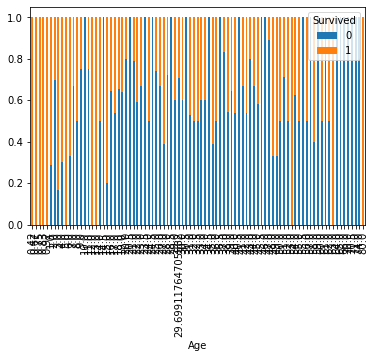

In [92]:
table= pd.crosstab(df_x['Age'],df_y['Survived']) 
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True) 

<AxesSubplot:xlabel='ageB'>

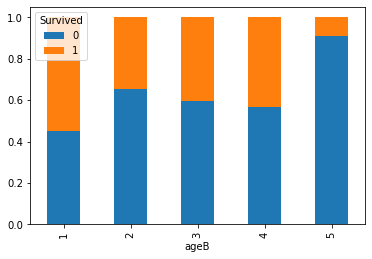

In [93]:
table= pd.crosstab(df_x['ageB'],df_y['Survived']) 
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True) 

<AxesSubplot:xlabel='Sex'>

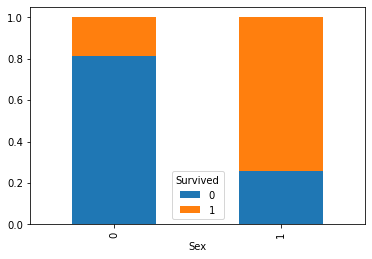

In [94]:
table= pd.crosstab(df_x['Sex'],df_y['Survived']) 
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True) 

<AxesSubplot:xlabel='Pclass'>

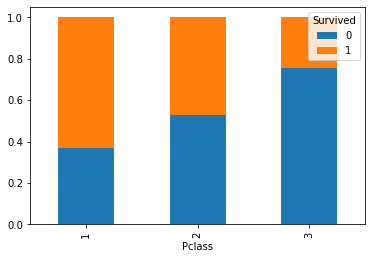

In [95]:
table= pd.crosstab(df_x['Pclass'],df_y['Survived']) 
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True) 

<AxesSubplot:xlabel='Pclass'>

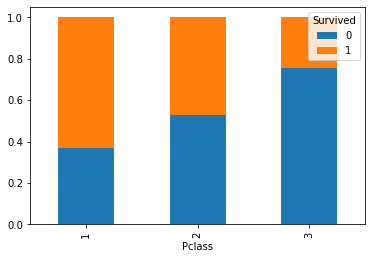

In [96]:
table= pd.crosstab(df_x['Pclass'],df_y['Survived']) 
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True) 

<AxesSubplot:xlabel='Fare'>

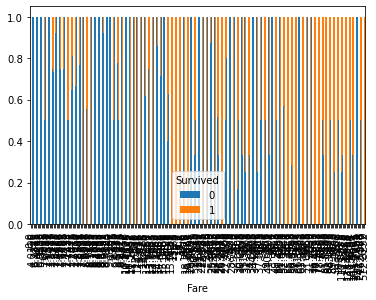

In [97]:
table= pd.crosstab(df_x['Fare'],df_y['Survived']) 
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True) 

In [100]:
df_x['FareGroup'] = pd.cut(df_x['Fare'], bins=3, labels=[1, 2, 3])

In [101]:
df_x['FareGroup']

0      1
1      1
2      1
3      1
4      1
      ..
886    1
887    1
888    1
889    1
890    1
Name: FareGroup, Length: 891, dtype: category
Categories (3, int64): [1 < 2 < 3]

In [105]:
df_x[df_x['FareGroup'] == 2]

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,isNanAge,isNanCabin,isNanEmbarked,ageB,FareGroup
27,1,0,19.000000,3,2,263.0000,1.0,1.0,False,False,False,2,2
88,1,1,23.000000,3,2,263.0000,1.0,1.0,False,False,False,2,2
118,1,0,24.000000,0,1,247.5208,1.0,2.0,False,False,False,2,2
299,1,1,50.000000,0,1,247.5208,1.0,2.0,False,False,False,4,2
311,1,1,18.000000,2,2,262.3750,1.0,2.0,False,False,False,2,2
341,1,1,24.000000,3,2,263.0000,1.0,1.0,False,False,False,2,2
377,1,0,27.000000,0,2,211.5000,1.0,2.0,False,False,False,2,2
380,1,1,42.000000,0,0,227.5250,0.0,2.0,False,True,False,3,2
438,1,0,64.000000,1,4,263.0000,1.0,1.0,False,False,False,4,2
527,1,0,29.699118,0,0,221.7792,1.0,1.0,True,False,False,2,2


<AxesSubplot:xlabel='FareGroup'>

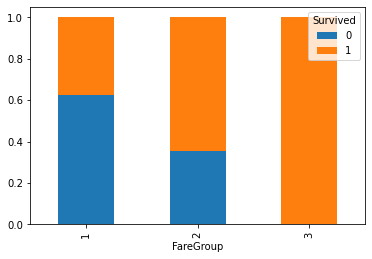

In [106]:
table= pd.crosstab(df_x['FareGroup'],df_y['Survived']) 
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True) 

<AxesSubplot:xlabel='Embarked'>

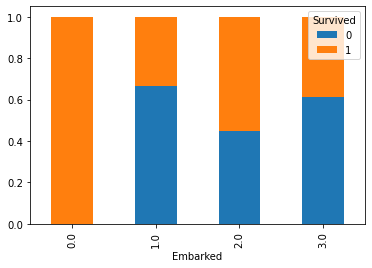

In [107]:
table= pd.crosstab(df_x['Embarked'],df_y['Survived']) 
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True) 

<AxesSubplot:xlabel='SibSp'>

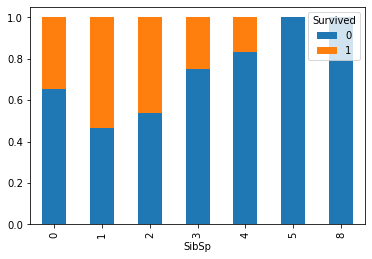

In [108]:
table= pd.crosstab(df_x['SibSp'],df_y['Survived']) 
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True) 

<AxesSubplot:xlabel='Parch'>

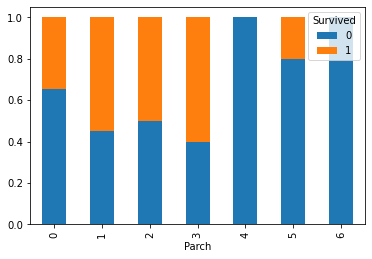

In [109]:
table= pd.crosstab(df_x['Parch'],df_y['Survived']) 
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True) 

In [110]:
df_x['FamilySize'] = df_x['SibSp'] + df_x['Parch'] + 1

In [111]:
df_x['FamilySize']

0      2
1      2
2      1
3      2
4      1
      ..
886    1
887    1
888    4
889    1
890    1
Name: FamilySize, Length: 891, dtype: int64

<AxesSubplot:xlabel='FamilySize'>

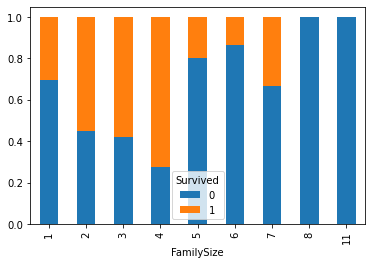

In [112]:
table= pd.crosstab(df_x['FamilySize'],df_y['Survived']) 
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True) 

In [113]:
df_x

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,isNanAge,isNanCabin,isNanEmbarked,ageB,FareGroup,FamilySize
0,3,0,22.000000,1,0,7.2500,0.0,1.0,False,True,False,2,1,2
1,1,1,38.000000,1,0,71.2833,1.0,2.0,False,False,False,3,1,2
2,3,1,26.000000,0,0,7.9250,0.0,1.0,False,True,False,2,1,1
3,1,1,35.000000,1,0,53.1000,1.0,1.0,False,False,False,3,1,2
4,3,0,35.000000,0,0,8.0500,0.0,1.0,False,True,False,3,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,0,27.000000,0,0,13.0000,0.0,1.0,False,True,False,2,1,1
887,1,1,19.000000,0,0,30.0000,1.0,1.0,False,False,False,2,1,1
888,3,1,29.699118,1,2,23.4500,0.0,1.0,True,True,False,2,1,4
889,1,0,26.000000,0,0,30.0000,1.0,2.0,False,False,False,2,1,1
